# NICO2AI  第3回 線形回帰 (7/8) 基礎演習
## 今日の目標
* デバッグの方法に慣れる
* 機械学習のライブラリscikitlearnをマスターする
* 機械学習の各手法を実際に動かしてみる

## キーワード
* デバッグ、pdb
* scikitlearn
* kmeans, SVM, PCA

## 基礎演習の進め方
1. 講師がコードの説明をします
2. 講師の指示にしたがって、各セルのコードを実行してください
3. 一部のコードは、「エラー例」「参考」用としてコメントアウトされています。必要に応じてコメントアウトを解除して挙動を確かめよう
4. "WRITE ME!"と書かれている部分は講師の指示とヒントに従いながら自分の手で書いてみましょう

In [2]:
#本日使うライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import pdb

## デバッグ（バグ取り）に慣れる
プログラムが複雑になってくると、バグの原因を見つけるのが難しくなってきます。
そこで今回はバグを取る方法をいくつか紹介します。

- **print文デバッグ:**
怪しい箇所にprint文を挟み、変数を確認する方法。
どんなプログラム言語でも有効な手段であり、よく使う。
- **pdb:**
python特有のデバッグ用ツール。インテラクティブに挙動を調べることができるので便利。

### printデバッグ
printデバッグは、変数を調べたいと思う箇所にprint文で変数の中身を出力させ想定している変数と合致するか確かめる方法です。


単純に変数を出力する以外にもこんな例があります。
- データのタイプを調べたい時　type(DATA)
- listの大きさを調べたい時 len(DATA)
- numpy配列の大きさを調べたいt時　DATA.shape


In [77]:
DATA = [1,2,3,4,5,6]
print(type(DATA))
print(len(DATA))
DATA = np.zeros([10,4])
print(DATA.shape)

<class 'list'>
6
(10, 4)


### pdbデバッグ
ここで、pdbというデバッグ用のライブラリを紹介します。これはpythonに標準装備されているライブラリです。<br>
エラー発生箇所の手前や変数の挙動を見たい位置に


``pdb.set_trace()``


という関数を挿入します。<br>
すると、挿入した箇所でいったんプログラムを中断すると同時に、インタラクティブなインターフェースが出てきます。<br>
例えば下の例で変数を打ち込んで中身を確かめてみてください。

**※pdbを終了する時は必ずq(quit)とコマンドを打って終了するようにしてください**

In [76]:
def plus(x=2, y=3):
    x = 2
    y = 3
    # pdb.set_trace() #これ
    z = x + y
    print("%d + %d = %d"%(x,y,z))
plus()

2 + 3 = 5


### 詳しいコマンドの使い方

<!--
左詰め表記が利かない？
| コマンド | 省略 | 概要 |
| :------ | ------ | :------ |
|help|h|コマンドのヘルプを表示「help」でコマンド一覧。<br>「help コマンド名」でコマンドのヘルプが表示される。|
|where|w|スタックトレースを表示|
|down|d|スタックトレース中に1レベル下げる|
|up|u|スタックトレース中に1レベル上げる|
|step|s|現在行を実行し、次の行に進む。<br>次の行が関数の場合、関数内で停止|
|next|n|現在行を実行し、次の行に進む。<br>次の行が関数でも、関数内では停止しない|
|return|r|現在の関数から抜ける|
|list|l|現在行周辺のソースを表示デフォルトは11行表示する|
|args|a|現在関数の引数一覧を表示
|p 式||式内容を表示|
|pp 式||式内容を pprint で表示|
|quit|q|デバッガ終了|
-->

<img src="pdb.png" width="50%" style="{text-align:left}">
この中でも特によく使うのは、
``list, next, args, quit``
あたりだと思います。覚えておくといいでしょう。

### 例題
（１）次のコードは前回線形回帰をするときに使ったコードですが、一部間違った箇所があり実行できません。
エラー文を読みつつデバッグしてみましょう。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(1701)

n_train = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, n_train)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

# X = (train_xにバイアス項1の列ベクトルを追加)
X = np.stack((train_x, np.ones(len(train_x))))#!!! axis=1を追加 !!!

# theta = (X^T X)^{-1} X^T y (方程式を解く)
theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, train_y))
print(theta)

ValueError: shapes (25,2) and (25,) not aligned: 2 (dim 1) != 25 (dim 0)

<hr>
# scikitlearn 入門
機械学習のライブラリ、scikit-learnについて勉強します。

scikit-learnでは基本的な流れとして
1. データの用意
2. モデルの選択
3. 訓練データのフィッティング(fit)
4. (テストデータの予測(predict))

という3ステップで実行することができます。

## scikitlearnで線形回帰を書いてみる
基礎演習では線形回帰を例に見てみましょう<br>
次の発展演習では公式リファレンスを見ながらkmeans, SVM, PCAのコードを書いてもらいます

**1.まずデータを用意します**

In [35]:
rnd = np.random.RandomState(1701)
n_train = 25  # 訓練データ数

# ガウシアンノイズを持つデータ点を生成
train_x = np.linspace(-3, 3, n_train)
train_y = 0.5 * train_x + 0.2 + 0.2 * rnd.randn(len(train_x))

**2.モデルを選択します**

線形回帰では

``sklearn.linear_model.LinearRegression``

という関数を使います。
パラメータを指定したい時などはここで指定してあげます。

公式サイトはこちらです:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<br>
線形回帰に限らず、公式サイトに詳しい解説が載っているので、使い方がよくわからなくなったら公式サイトをチェックするようにしましょう


In [13]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

**3.フィッティングさせます**

In [65]:
clf.fit(train_x.reshape(-1,1), train_y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**4.テストデータの予測をします**

In [66]:
test_x = [[-2.25],[-1],[0.5],[2.3]]
predict = clf.predict(test_x)
print(predict)

[[-0.99701897]
 [-0.3514131 ]
 [ 0.42331395]
 [ 1.3529864 ]]


**（補足）直線の形を調べる**

線形回帰では予測よりも実際の直線を知りたいことが多いですが、
その時は次のようにします

In [67]:
# 傾き
print(clf.coef_)
# 切片
print(clf.intercept_)

[[ 0.5164847]]
[ 0.1650716]


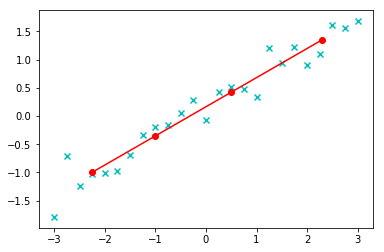

In [83]:
# 訓練データ、テストデータをプロットしてみる
plt.scatter(train_x, train_y, marker="x",color="c")
plt.scatter(test_x, predict, color="r")
plt.plot(test_x, predict, color="r")
plt.show()

簡単に線形回帰することができましたね。